# Using Machine Learning Tools Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Note that some questions require writing a small amount of code and some require graphical results. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Chapter 2 of the textbook is based on a similar workflow to this assignment, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant although do not use ones which directly relate to these questions with this dataset (which would normally only be found in someone else's assignment answers). If you take a large portion of code or text from the internet then you should reference where this was taken from, but we do not expect any references for small pieces of code. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

## The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


**STEP01:** 
Load the data set from the csv file (SeoulBikeData.csv) into a DataFrame, and summarise it with the pandas functions `describe()` and `info()`.

Download the data set from MyUni using the link provided on the assignment page. A paper that describes one related version of this dataset is: Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020. Feel free to look at this if you want more information about the dataset.

The data is stored in a CSV (comma separated variable) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

**Load the data set from the csv file into a DataFrame, and summarise it with at least two appropriate pandas functions.**

_Points:_ 2

In [13]:
data = pd.read_csv('SeoulBikeData.csv')

print(data.describe())
print(data.info())

# The following code is used by the autograder, don't change it
step1_sol = data.shape

       Rented Bike Count         Hour  Temperature (C)  Humidity (%)  \
count        8760.000000  8760.000000      8760.000000   8760.000000   
mean          704.602055    11.502740        12.914361     58.240183   
std           644.997468     6.922779        12.347109     20.584774   
min             0.000000     0.000000       -17.800000    -26.000000   
25%           191.000000     6.000000         3.500000     42.000000   
50%           504.500000    12.000000        13.700000     57.000000   
75%          1065.250000    18.000000        22.500000     74.000000   
max          3556.000000    24.000000       306.000000    309.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature (C)  \
count       8759.000000       8760.000000                8759.000000   
mean           1.953237       1436.442808                   4.074369   
std           21.376612        608.827735                  13.061011   
min            0.000000       -678.000000                 -30.6

grader.check("step01")

**STEP02:** To get a feeling for the data it is a good idea to do some form of simple visualisation. Display a set of histograms for the features as they are right now, prior to any cleaning steps.

_Points:_ 0

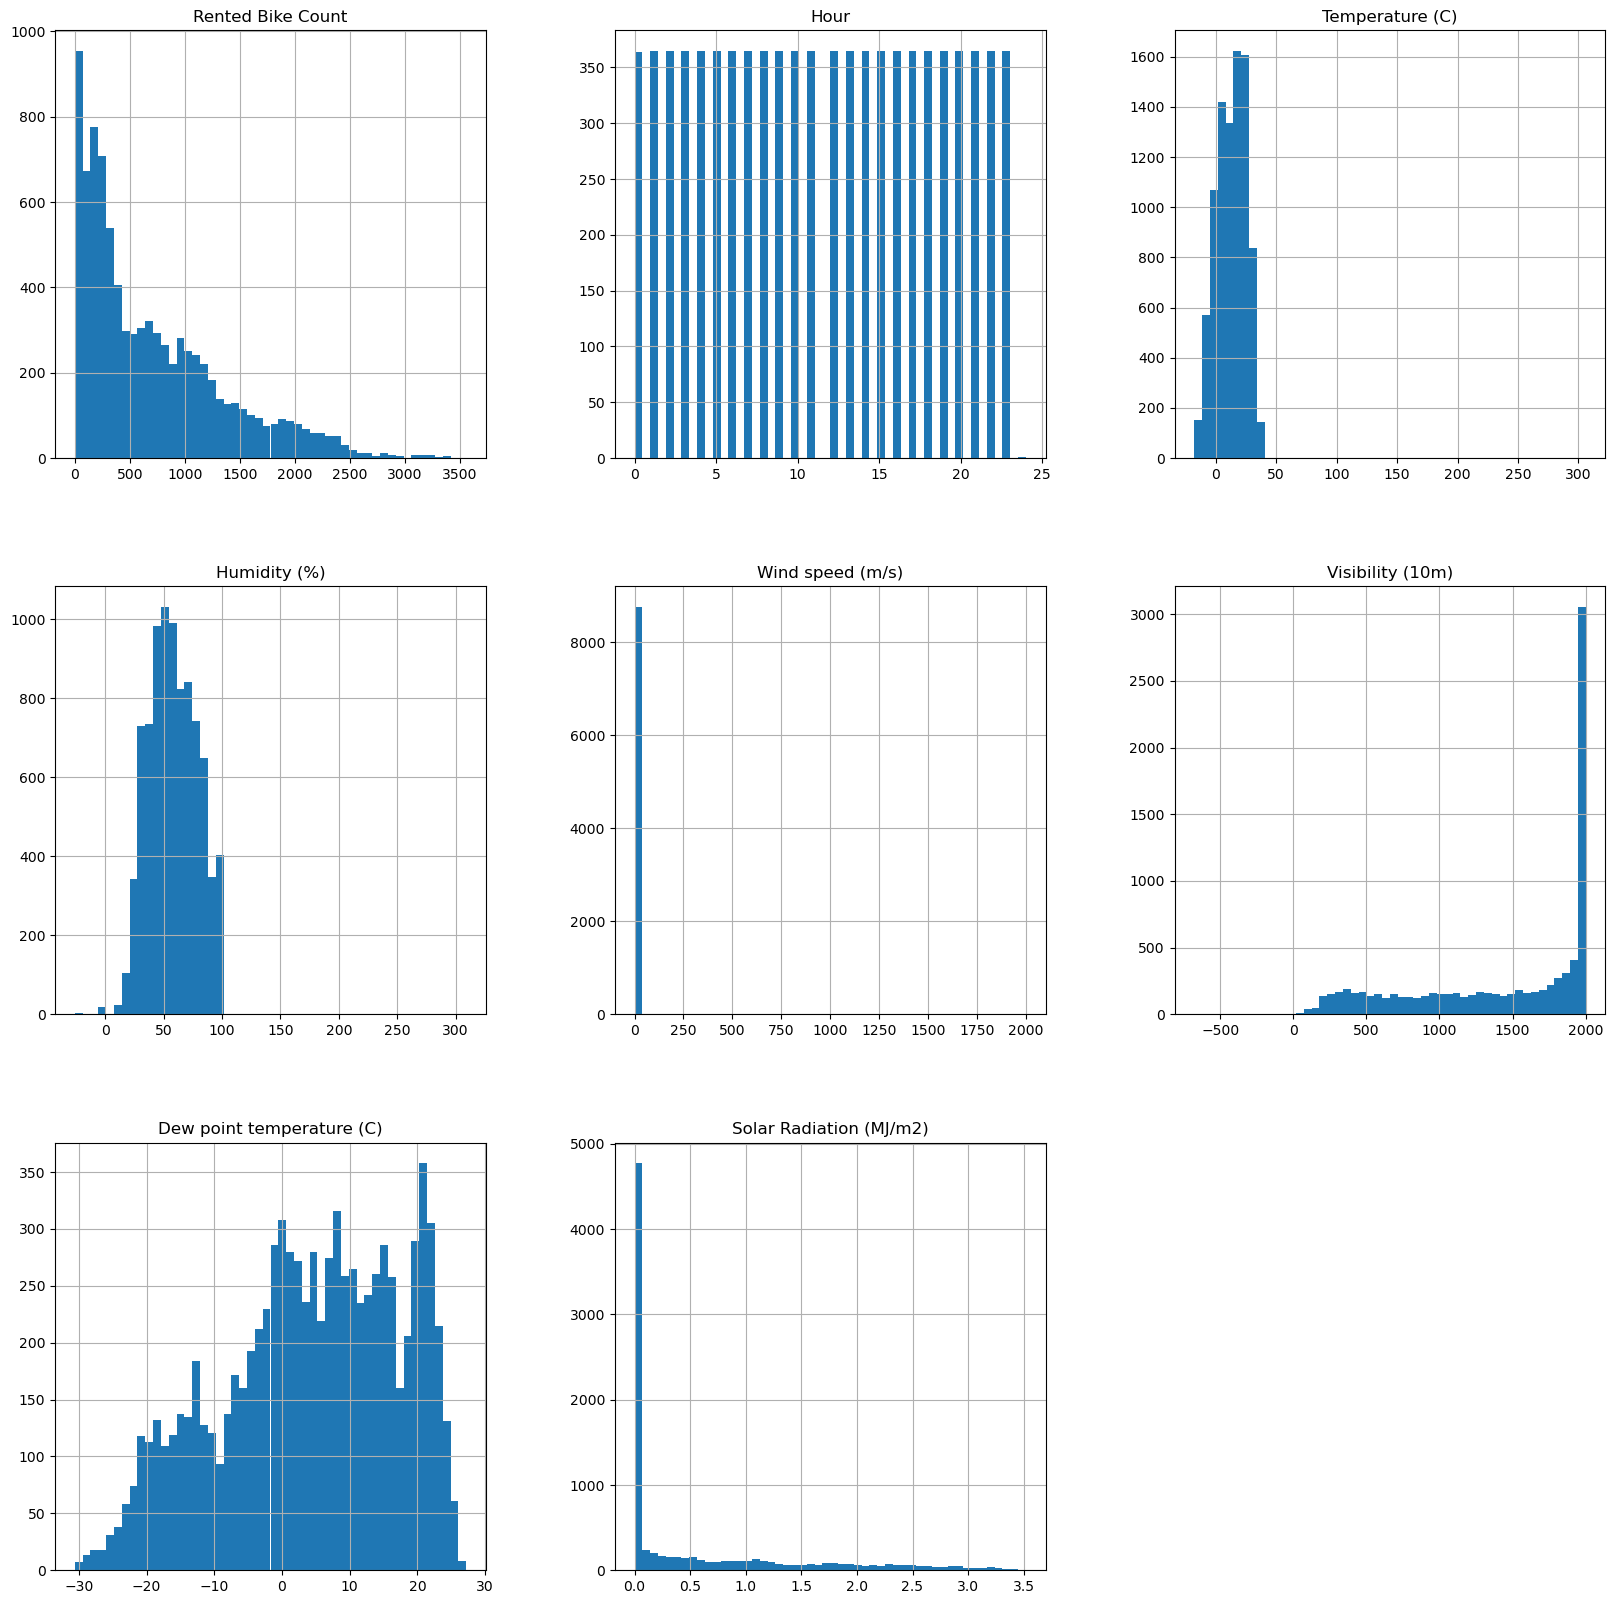

In [18]:
data.hist(bins=50,figsize=(20,20))
plt.show()

grader.check("step02")

**STEP03:** The "Functioning Day" feature records whether the bike rental was open for business on that day. For this assignment we are only interested in predicting demand on days when the business is open, so remove rows from the DataFrame where the business is closed. After doing this, delete the Functioning Day feature from the DataFrame and verify that this worked. **While you might solve this question in one way, be aware that there are multiple methods to achieve the same result in pandas, and these methods might be the subject of a question in the PracQuiz1 about this assignment.**

_Points:_ 3

In [14]:
data = pd.read_csv('SeoulBikeData.csv')

#  only interested in predicting demand on days when the business is open, so remove rows from the DataFrame where the business is closed
data = data.loc[data["Functioning Day"] == "Yes"]
data = data.loc[data["Rented Bike Count"] != 0]

# delete the Functioning Day feature from the DataFrame
data.drop(columns=["Functioning Day"], inplace=True)

# verify that this worked
print(data.count())

# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step3_data
step3_data = data.copy()

Date                         8465
Rented Bike Count            8465
Hour                         8465
Temperature (C)              8465
Humidity (%)                 8465
Wind speed (m/s)             8464
Visibility (10m)             8465
Dew point temperature (C)    8464
Solar Radiation (MJ/m2)      8465
Rainfall(mm)                 8463
Snowfall (cm)                8465
Seasons                      8465
Holiday                      8465
dtype: int64


grader.check("step03")

**STEP04:** 
The goal is to predict bike rental demand using historical data. To achieve this, you will use regression techniques with "Bike Rental Count" as the target feature for this prediction, *but for this*, it is important that all other features in the data are numerical. Two of the features in the data, "Holiday" and "Season", need to be converted to numerical format. Write code to convert the "Holiday" feature to 0 or 1 from its current format. For the "Season" feature, add 4 new columns, labeled as "Winter", "Spring", "Summer", and "Autumn" then remove the "Season" column. Each of these columns should store a 0 or 1, depending on the corresponding season in each row. **While you might solve this question in one way, be aware that there are multiple methods to achieve the same result in pandas, and these methods might be the subject of a question in the PracQuiz1 about this assignment.**

_Points:_ 3

In [15]:
import pandas as pd

data = pd.read_csv('SeoulBikeData.csv')
print(data.columns)  

data['Holiday'] = data['Holiday'].map({'No Holiday': 0, 'Holiday': 1})

for season in ['Winter', 'Spring', 'Summer', 'Autumn']:
    data[season] = 0

data.loc[data['Seasons'] == 'Winter', 'Winter'] = 1
data.loc[data['Seasons'] == 'Spring', 'Spring'] = 1
data.loc[data['Seasons'] == 'Summer', 'Summer'] = 1
data.loc[data['Seasons'] == 'Autumn', 'Autumn'] = 1

data.drop(columns=['Seasons'], inplace=True)

# The following code is used by the autograder, don't change it
step4_data = data.copy()

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature (C)', 'Humidity (%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature (C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


grader.check("step04")

**STEP05**: It is known that bike rentals depend strongly on whether it's a weekday or a weekend. Replace the Date feature with a Weekday feature that stores 0 or 1 depending on whether the date represents a weekend or weekday. **While you might solve this question in one way, be aware that there are multiple methods to achieve the same result in pandas, and these methods might be the subject of a question in the PracQuiz1 about this assignment.**

_Points:_ 3

In [13]:
import pandas as pd
import datetime

data = pd.read_csv('SeoulBikeData.csv')

def date_is_weekday(datestring):
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]), int(dsplit[1]), int(dsplit[0])).weekday()
    return int(wday <= 4)

data['Weekday'] = data['Date'].apply(date_is_weekday)

data.drop(['Date'], axis=1, inplace=True)

# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step5_data
step5_data = data.copy()

grader.check("step05")

**STEP06** Convert all the remaining data to numerical format, with any non-numerical entries set to NaN.

_Points:_ 3

In [14]:
import pandas as pd
import numpy as np

data = pd.read_csv('SeoulBikeData.csv')

def is_functional_day(day):
    return 1 if day == 'Yes' else 0

data['Functioning Day'] = data['Functioning Day'].apply(is_functional_day)

data = data.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Display information
data.info()

# The following code is used by the autograder
# make sure your variable that contains that DataFrame from this step is the one assigned to step6_data
step6_data = data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       0 non-null      float64
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   int64  
 5   Wind speed (m/s)           8759 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8759 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8735 non-null   float64
 10  Snowfall (cm)              8737 non-null   float64
 11  Seasons                    0 non-null      float64
 12  Holiday                    0 non-null      float64
 13  Functioning Day            8760 non-null   int64

grader.check("step06")

**STEP07** Examin the data and identify problematic entries. Set any problematic values in the numerical data to `np.nan` and check that this has worked. Once this is done, specify a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* any other pre-processing** that you think should be used. Just specify the pipeline - do ***not*** run it now.

_Points:_ 3

In [15]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

data.loc[data['Rented Bike Count'] < 0, 'Rented Bike Count'] = np.nan
data.loc[data['Hour'] < 0, 'Hour'] = np.nan
data.loc[data["Temperature (C)"] > 100, "Temperature (C)"] = np.nan
data.loc[data["Humidity (%)"] > 100, "Humidity (%)"] = np.nan
data.loc[data["Humidity (%)"] < 0, "Humidity (%)"] = np.nan
data.loc[data["Wind speed (m/s)"] > 20, "Wind speed (m/s)"] = np.nan
data.loc[data["Visibility (10m)"] < 0, "Visibility (10m)"] = np.nan

# keep the variable name pipeline_step7 as you will use it in STEP09
pipeline_step7 = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())  
])

# The following code is used by the autograder
# make sure your variable that contains the solutions from this step is the one assigned to step7_data as follows
step7_data = [data.copy(),pipeline_step7]

grader.check("step07")

**STEP08:** Generate a pre-processed version of the entire dataset by applying the pipeline defined in STEP07. Then, calculate the correlation of each feature with the target using either the pandas function corr() or numpy corrcoef() and find the 3 attributes that are the most correlated with bike rentals. 

_Points:_ 3

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline  

data = pd.read_csv('SeoulBikeData.csv', parse_dates=['Date'], dayfirst=True)


data['Hour'] = data['Date'].dt.hour
data['Winter'] = data['Date'].dt.month.isin([12, 1, 2]).astype(int)

data.drop(['Date'], axis=1, inplace=True)

X = data.drop('Rented Bike Count', axis=1)
y = data['Rented Bike Count']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_attribs = ['Temperature (C)', 'Hour', 'Winter']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])

X_train_preprocessed = full_pipeline.fit_transform(X_train)
X_train_preprocessed_with_target = np.c_[X_train_preprocessed, y_train]

# Convert to DataFrame for easier correlation analysis
columns = num_attribs + ['Rented Bike Count']  # Adjust column names as appropriate
X_train_df = pd.DataFrame(X_train_preprocessed_with_target, columns=columns)

# Calculate correlation and select the top 3 features
correlation_matrix = X_train_df.corr()
top_3_features = correlation_matrix['Rented Bike Count'].abs().sort_values(ascending=False)[1:4].index.tolist()

# top_3 should be an array of 3 strings ['attribute name', 'attribute name','attribute name']
top_3 = top_3_features

print(top_3)

# The following code is used by the autograder
# make sure your variable that contains a list of the names of the top 3 attributes is assigned to step3_data
step8_data = top_3.copy()

['Temperature (C)', 'Winter', 'Hour']


grader.check("step08")

**STEP09:** Divide the data into training and test sets using where 20% of the data is kept for testing. Create a pipeline that includes the linear regression model in addition to the pipeline defined in STEP07. Fit the pipeline to the training set and calculate the `rmse` of the fit to evaluate its performance. As a comparison, compute the `rmse` that would be obtained by predicting the mean value of bike rentals for all training examples.

_Points:_ 3

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from math import sqrt


data.replace('No Record', np.nan, inplace=True)

numeric_features = ['Temperature (C)', 'Humidity (%)', 'Wind speed (m/s)', 'Visibility (10m)']
categorical_features = ['Seasons', 'Holiday', 'Functioning Day']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),  # with_mean=False because sparse matrix cannot be centered
    ('regressor', LinearRegression())
])

# Split the data
X = data.drop('Rented Bike Count', axis=1)
y = data['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# calculate the RMSE of the fit to the training data
y_train_pred = pipeline.predict(X_train)
rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))

# Baseline model (predicting mean)
mean_y_train = y_train.mean()
y_baseline_pred = np.full_like(y_train, mean_y_train)
# calculate the RMSE of the baseline model (by predicting the mean value of bike rentals for all training examples)
rmse_baseline = sqrt(mean_squared_error(y_train, y_baseline_pred))

print("RMSE for training data:", rmse_train)
print("RMSE for baseline (predicting mean):", rmse_baseline)

# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step3_data
step9_data = [rmse_train,rmse_baseline]

RMSE for training data: 486.2466992091745
RMSE for baseline (predicting mean): 644.830749602996


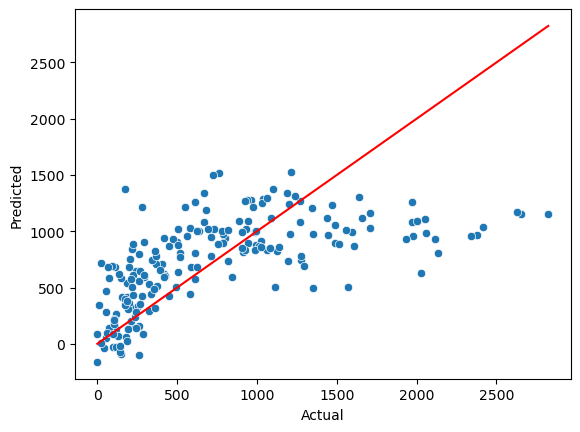

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the defined `pipeline` for prediction on a subset of the training data
subset_size = 200
y_train_pred = pipeline.predict(X_train[:subset_size])

# Create a scatterplot of predicted vs actual values
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
# Draw a line for perfect predictions
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')

plt.show()

grader.check("step09")

**STEP10:**  Fit a Kernel Ridge regression model (imported from sklearn.kernel_ridge) to the X_train data from STEP09. Build a new pipeline that includes the Kernel Ridge regression model in addition to the pipeline defined in STEP07, and fit it to the training data using default settings. Generate a scatter plot of the predicted values against the actual values for the training data, and calculate the RMSE of the fit to the training data.

_Points:_ 3

In [25]:
from sklearn.kernel_ridge import KernelRidge

pipeline_step10 = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('kernelridge', KernelRidge())   
])

pipeline_step10.fit(X_train, y_train)

y_pred_train_KR = pipeline_step10.predict(X_train)
rmse_train_KR = sqrt(mean_squared_error(y_train, y_pred_train_KR))

print('Kernel Ridge model RMSE on training data:', rmse_train_KR)

# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step3_data
step10_data = [rmse_train_KR,pipeline_step10]

Kernel Ridge model RMSE on training data: 486.2469161511615


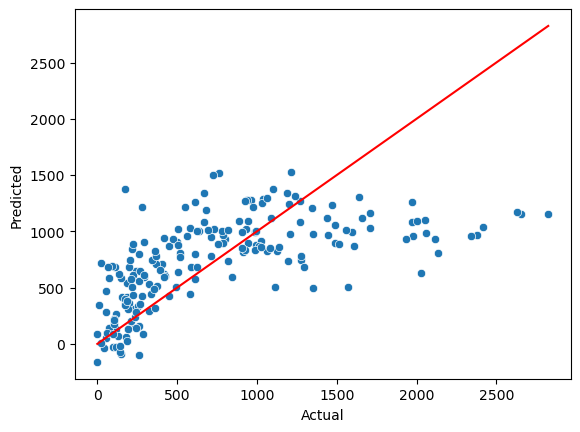

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using the pipeline from Part 1 to predict on a subset of the training data
subset_size = 200
y_train_pred_subset = pipeline_step10.predict(X_train.iloc[:subset_size])

# Creating a scatter plot of predicted vs actual values for the subset
ax = sns.scatterplot(x=y_train.iloc[:subset_size], y=y_train_pred_subset)
sns.lineplot(x=y_train.iloc[:subset_size], y=y_train.iloc[:subset_size], color='red')  # Line for perfect predictions
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

grader.check("step10")

**STEP11:** Fit a Support Vector Regression (from sklearn.svm import SVR). As you did for STEP10, create a new pipeline using the pipelinr from STEP07 and this model and fit it to your training data, using the default settings. Again, calculate the RMSE of the fit to the training data.

_Points:_ 4

In [44]:
from sklearn.svm import SVR

pipeline_step11 = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('svr', SVR())  
])

pipeline_step11.fit(X_train, y_train)

y_pred_train_SVR = pipeline_step11.predict(X_train)
rmse_train_SVR = sqrt(mean_squared_error(y_train, y_pred_train_SVR))

print('Support Vector Regression model RMSE on training data:', rmse_train_SVR)

# The following code is used by the autograder
# make sure your variable that contains that data from this step is the one assigned to step3_data
step11_data = [rmse_train_SVR,pipeline_step11]

Support Vector Regression model RMSE on training data: 659.4587171222469


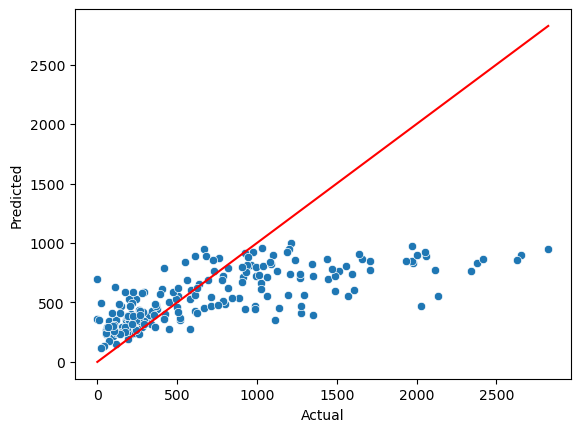

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using the pipeline from Part 1 to predict on a subset of the training data
subset_size = 200
y_train_pred_subset = pipeline_step11.predict(X_train.iloc[:subset_size])

# Creating a scatter plot of predicted vs actual values for the subset
ax = sns.scatterplot(x=y_train.iloc[:subset_size], y=y_train_pred_subset)
sns.lineplot(x=y_train.iloc[:subset_size], y=y_train.iloc[:subset_size], color='red')  # Line for perfect predictions
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

grader.check("step11")

**STEP12:** Perform a 10 fold cross validation for each of the three model (LinearRegression,KernelRidge,SVR). This splits the training set (that we've used above) into 10 equal size subsets, and uses each in turn as the validation set while training a model with the other 9. You should therefore have 10 rmse values for each cross validation run. Find the mean and standard deviation of the rmse values obtained for each model for the validation splits.

_Points:_ 5

In [27]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer, mean_squared_error
from math import sqrt
import numpy as np
import pandas as pd


data = pd.read_csv('SeoulBikeData.csv')

def rmse_scorer(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

rmse = make_scorer(rmse_scorer, greater_is_better=False)

numeric_features = ['Temperature (C)', 'Humidity (%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Hour']
categorical_features = ['Seasons', 'Holiday', 'Functioning Day']

data.replace('No Record', np.nan, inplace=True)

data['Functioning Day'] = data['Functioning Day'].map({'Yes': 1, 'No': 0})
data['Holiday'] = data['Holiday'].map({'No Holiday': 0, 'Holiday': 1})

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', 'passthrough', ['Functioning Day', 'Holiday'])
    ])

lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
kr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('kernelridge', KernelRidge())])
svr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('svr', SVR())])

X = data.drop('Rented Bike Count', axis=1)
y = data['Rented Bike Count']

# 10-fold cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation for each model
scores_lr = cross_val_score(lr_pipeline, X, y, cv=kf, scoring=rmse)
scores_kr = cross_val_score(kr_pipeline, X, y, cv=kf, scoring=rmse)
scores_svr = cross_val_score(svr_pipeline, X, y, cv=kf, scoring=rmse)

# Calculate mean and std RMSE for each model
rmse_LR_mean, rmse_LR_std = scores_lr.mean(), scores_lr.std()
rmse_KR_mean, rmse_KR_std = scores_kr.mean(), scores_kr.std()
rmse_SVR_mean, rmse_SVR_std = scores_svr.mean(), scores_svr.std()

rmse_LR_mean, rmse_LR_std, rmse_KR_mean, rmse_KR_std, rmse_SVR_mean, rmse_SVR_std

# Print out the results for each model
print('Linear Regression CV Scores:') 
print(f'Mean: {-rmse_LR_mean:.2f}, Std: {rmse_LR_std:.2f}\n')

print('Kernel Ridge Regression CV Scores:') 
print(f'Mean: {-rmse_KR_mean:.2f}, Std: {rmse_KR_std:.2f}\n')

print('Support Vector Regression CV Scores:') 
print(f'Mean: {-rmse_SVR_mean:.2f}, Std: {rmse_SVR_std:.2f}\n')

# The following code is used by the autograder
step12_data = [rmse_LR_mean,rmse_KR_mean,rmse_SVR_mean]

Linear Regression CV Scores:
Mean: 502.38, Std: 128.40

Kernel Ridge Regression CV Scores:
Mean: 502.80, Std: 129.38

Support Vector Regression CV Scores:
Mean: 486.55, Std: 22.31



grader.check("step12")

**STEP13:** Both the Kernel Ridge Regression and Support Vector Regression have hyperparameters that can be adjusted to suit the problem. Use grid search to systematically compare the generalisation performance (rmse) obtained with different hyperparameter settings (still with 10-fold CV). Use the sklearn function GridSearchCV to do this.

For KernelRidge, vary the hyperparameter alpha. (note, if you are using KernelRidge as the last step in a pipeline, alpha is refered to as kernelridge__alpha) 

For SVR, vary the hyperparameter C. (note, if you are using SVR as the last step in a pipeline, C is refered to as SVR__C)

Find the hyperparameter setting for each medel.

Finally, train and apply both models, with the best hyperparameter settings, to the test set and report the performance as rmse.

_Points:_ 5

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Define your preprocessor
numeric_features = ['Temperature (C)', 'Humidity (%)', 'Wind speed (m/s)', 'Visibility (10m)']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Seasons', 'Holiday', 'Functioning Day']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Load data
data = pd.read_csv('SeoulBikeData.csv')

# Define X and y
X = data.drop('Rented Bike Count', axis=1)
y = data['Rented Bike Count']

# Define the cross-validation strategy
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Continue with pipeline and GridSearchCV as before...


# GridSearchCV for Kernel Ridge Regression
kr_cv_a = {'kernelridge__alpha': [0.1, 1, 10, 100, 1000]}
kr_cv = GridSearchCV(pipeline_step10, kr_cv_a, cv=cv, scoring='neg_root_mean_squared_error').fit(X_train, y_train)

# GridSearchCV for Support Vector Regression
svr_cv_a = {'svr__C': [0.1, 1, 10, 100, 1000]}
svr_cv = GridSearchCV(pipeline_step11, svr_cv_a, cv=cv, scoring='neg_root_mean_squared_error').fit(X_train, y_train)

# Print the best hyperparameter settings
print("Best hyperparameter setting for Kernel Ridge Regression:", kr_cv.best_params_)
print("Best hyperparameter setting for Support Vector Regression:", svr_cv.best_params_)

# Recreate pipelines with the best parameters
pipeline_best_kr = Pipeline([
    ('preprocessor', preprocessor), 
    ('kernelridge', KernelRidge(alpha=kr_cv.best_params_['kernelridge__alpha']))
])

pipeline_best_svr = Pipeline([
    ('preprocessor', preprocessor),  
    ('svr', SVR(C=svr_cv.best_params_['svr__C']))
])

# Train and predict on the test set
kr_predictions = pipeline_best_kr.fit(X_train, y_train).predict(X_test)
kr_rmse = np.sqrt(mean_squared_error(y_test, kr_predictions))

svr_predictions = pipeline_best_svr.fit(X_train, y_train).predict(X_test)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_predictions))

print("Kernel Ridge Regression RMSE on test set:", kr_rmse)
print("Support Vector Regression RMSE on test set:", svr_rmse)

# Assign the data for the autograder
step13_data = [kr_rmse, svr_rmse, kr_cv, svr_cv, pipeline_best_kr, pipeline_best_svr]


Best hyperparameter setting for Kernel Ridge Regression: {'kernelridge__alpha': 1000}
Best hyperparameter setting for Support Vector Regression: {'svr__C': 1000}
Kernel Ridge Regression RMSE on test set: 493.31474169121884
Support Vector Regression RMSE on test set: 444.09036273705965


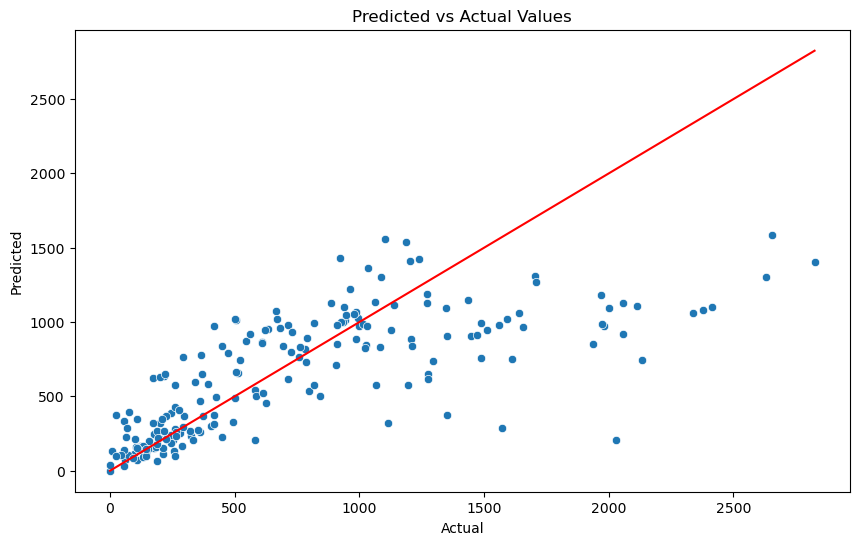

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming pipeline_best_svr is already defined and trained as per your previous steps

# Use your pipeline_best_svr to predict on 200 points from the training data
subset_size = 200
y_train_pred = pipeline_best_svr.predict(X_train[:subset_size])

# Then create a scatterplot of predicted vs actual values using your variables from the cell above
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x=y_train[:subset_size], y=y_train_pred)
sns.lineplot(x=y_train[:subset_size], y=y_train[:subset_size], color='red')  # Ideal prediction line
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.show()


grader.check("step13")